In [2]:
import numpy as np
import sep

In [3]:
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib import rcParams

%matplotlib inline

rcParams['figure.figsize'] = [10., 8.]

In [4]:
data = fits.getdata("./hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits")
data = data.byteswap(inplace=True).newbyteorder()

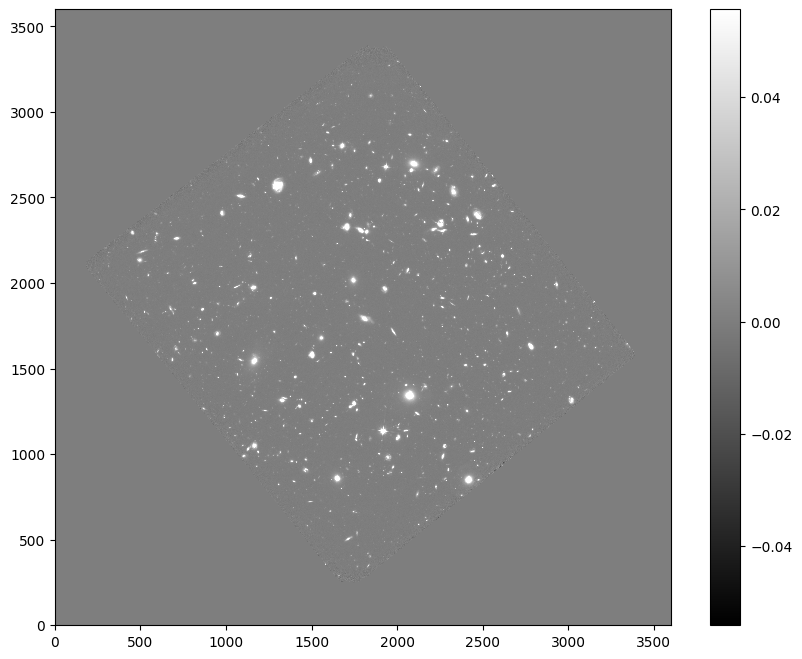

In [5]:
m, s = np.mean(data), np.std(data)
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();
plt.savefig('figure5.png')

In [6]:
# measure a spatially varying background on the image
bkg = sep.Background(data)

In [7]:
bkg = sep.Background(data, bw=64, bh=64, fw=3, fh=3)

In [8]:
print(bkg.globalback)
print(bkg.globalrms)

0.0
0.0005398219218477607


In [9]:
bkg_image = bkg.back()

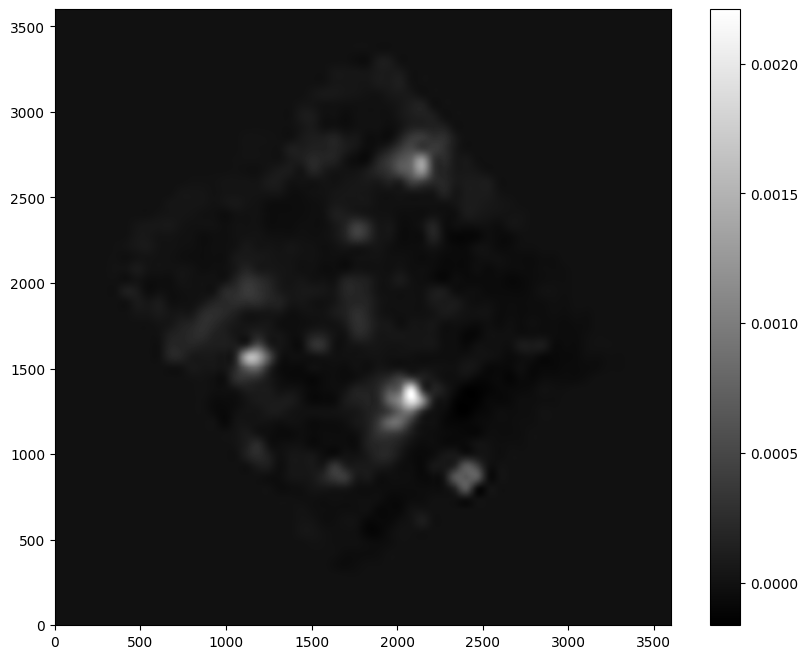

In [10]:
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.savefig('figure6.png')

In [11]:
bkg_rms = bkg.rms()

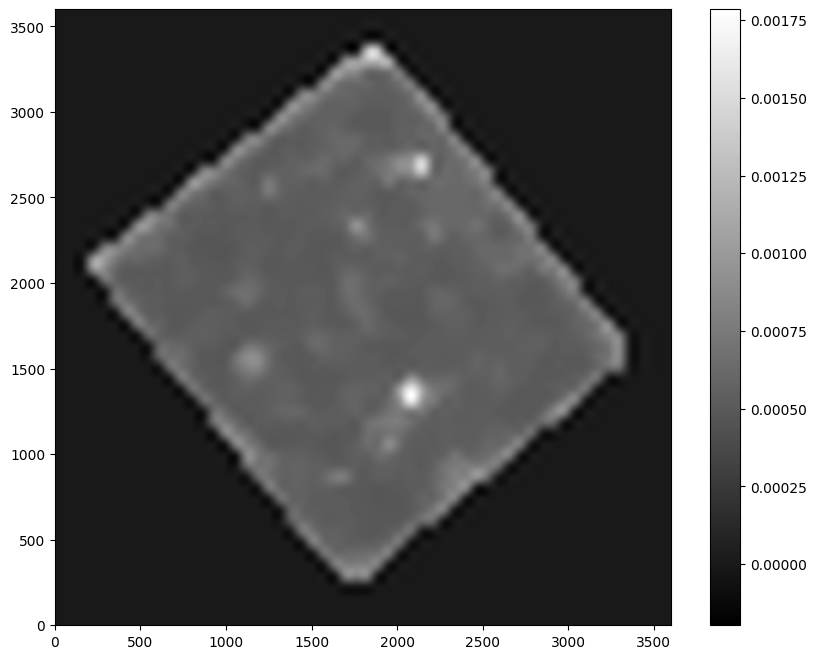

In [12]:
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.savefig('figure7.png')

In [13]:
data_sub = data - bkg

In [14]:
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

In [15]:
len(objects)
print(f'I found {len(objects)} sources')

I found 8643 sources


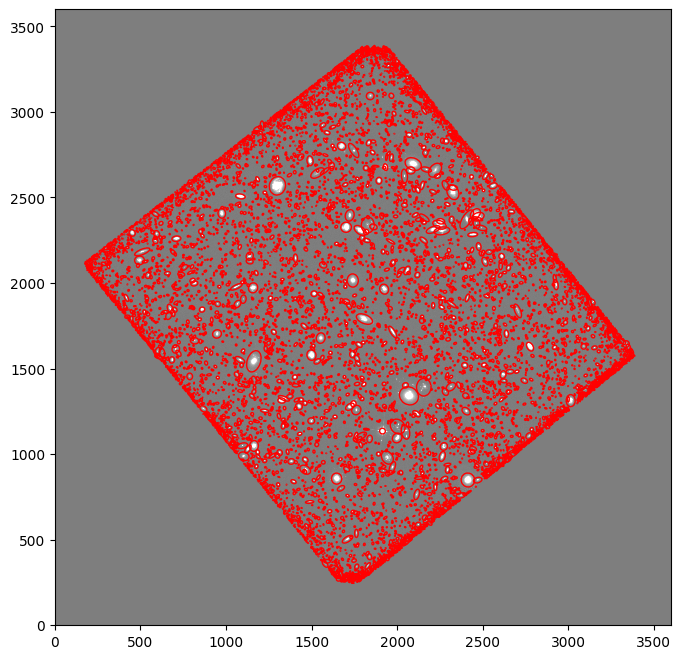

In [16]:
from matplotlib.patches import Ellipse

# plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)
    
plt.savefig('figure8.png')

In [17]:
objects.dtype.names

('thresh',
 'npix',
 'tnpix',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'x',
 'y',
 'x2',
 'y2',
 'xy',
 'errx2',
 'erry2',
 'errxy',
 'a',
 'b',
 'theta',
 'cxx',
 'cyy',
 'cxy',
 'cflux',
 'flux',
 'cpeak',
 'peak',
 'xcpeak',
 'ycpeak',
 'xpeak',
 'ypeak',
 'flag')

In [18]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'],
                                     3.0, err=bkg.globalrms, gain=1.0)

In [19]:
# show the first 10 objects results:
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))

object 0: flux = 0.031282 +/- 0.176890
object 1: flux = 0.031018 +/- 0.176142
object 2: flux = -0.024388 +/- 0.002883
object 3: flux = 0.001947 +/- 0.044219
object 4: flux = 0.012457 +/- 0.111649
object 5: flux = -0.011228 +/- 0.002875
object 6: flux = 0.029368 +/- 0.171394
object 7: flux = -0.009126 +/- 0.002875
object 8: flux = 0.048023 +/- 0.219161
object 9: flux = 0.027840 +/- 0.166877


/tmp/ipykernel_144309/100786371.py:1: RuntimeWarning: invalid value encountered in log10
  m_f105w = -2.5*np.log10(flux)


Text(0, 0.5, 'N')

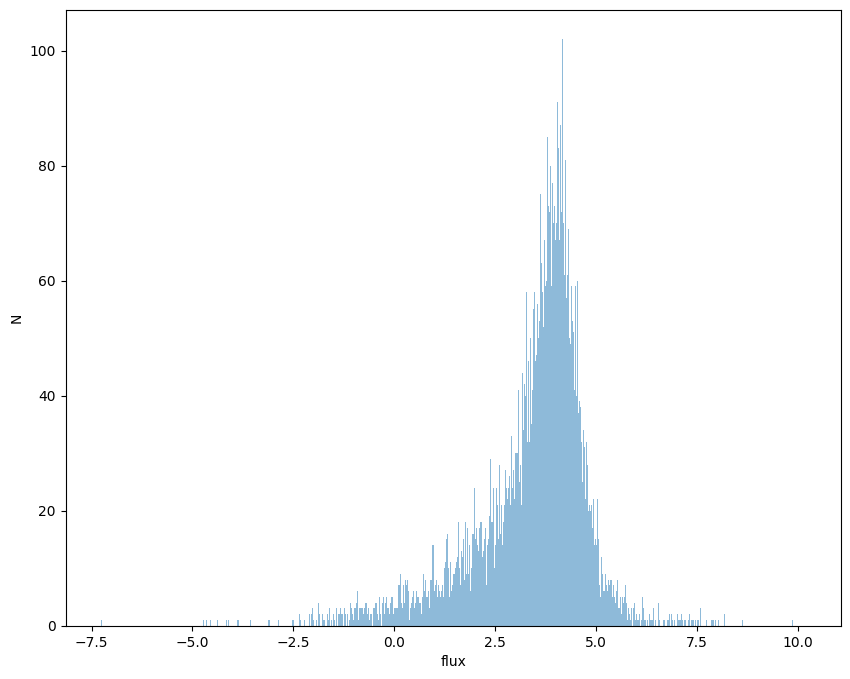

In [20]:
m_f105w = -2.5*np.log10(flux)
plt.hist(m_f105w, bins = 1000, alpha = 0.5)
plt.xlabel('flux')
plt.ylabel('N')

In [21]:
mean, deviation, median = np.mean(flux), np.std(flux), np.median(flux)

print(f'This is the mean = {mean}, This is the standard deviation = {deviation}, This is the median = {median}')

This is the mean = 0.3617466258281149, This is the standard deviation = 9.241925555851745, This is the median = 0.030954822942148894


In [22]:
min_flux = np.min(flux)
max_flux = np.max(flux)

print(f"Min Flux: {min_flux}")
print(f"Max Flux: {max_flux}")
print(f'The largest outlier in the distribution is {max_flux} because the max flux subtracted by the mean is = {max_flux-mean} and the minimum flux subtracted by the mean is = {abs(min_flux-mean)}. There is no point beyond the min and max flux so these are the two options for the largest outlier and since the difference between the max flux and the mean is greater than the difference between the min flux and the mean, the max flux is the farthest point away from the mean. Therefore, the max flux is the largest outlier')

Min Flux: -1.061365427845663
Max Flux: 807.2972835731507
The largest outlier in the distribution is 807.2972835731507 because the max flux subtracted by the mean is = 806.9355369473226 and the minimum flux subtracted by the mean is = 1.423112053673778. There is no point beyond the min and max flux so these are the two options for the largest outlier and since the difference between the max flux and the mean is greater than the difference between the min flux and the mean, the max flux is the farthest point away from the mean. Therefore, the max flux is the largest outlier


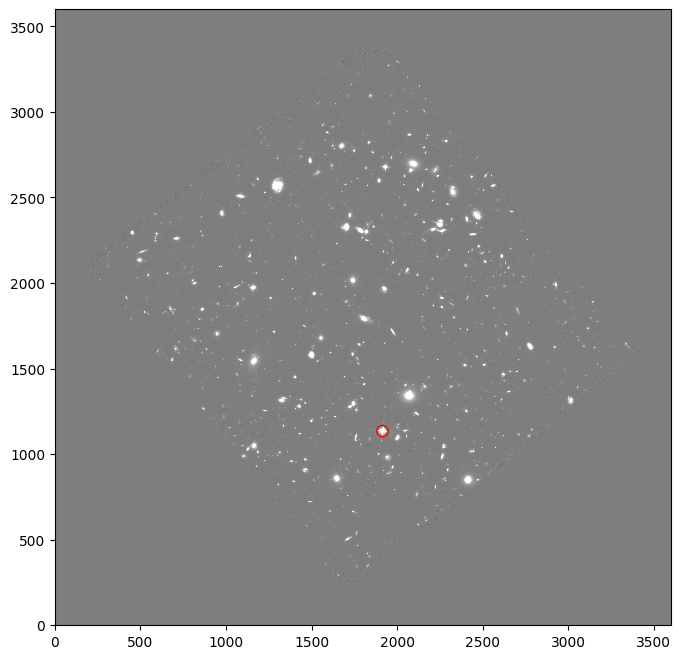

In [23]:
fig, ax = plt.subplots()
loc = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plot an ellipse for each object    
for i in range(len(objects)):
    if flux[i] == max_flux:
        l = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                    width=12*objects['a'][i],
                    height=12*objects['b'][i],
                    angle=objects['theta'][i] * 180. / np.pi)
        l.set_facecolor('none')
        l.set_edgecolor('red')
        ax.add_artist(l)
        
#This shows where the largest outlier is on the image, which is the max flux, by circling it in red.

In [24]:
num_std_dev_max_flux = (max_flux - mean) / deviation
num_std_dev_max_flux

print(f'It is {num_std_dev_max_flux} standard deviations away from the mean')

It is 87.31249046216263 standard deviations away from the mean


In [25]:
data2 = fits.getdata("./hlsp_hudf12_hst_wfc3ir_udfmain_f125w_v1.0_drz.fits")
data2 = data2.byteswap(inplace=True).newbyteorder()

data3 = fits.getdata("./hlsp_hudf12_hst_wfc3ir_udfmain_f160w_v1.0_drz.fits")
data3 = data3.byteswap(inplace=True).newbyteorder()

In [26]:
bkg_data = sep.Background(data)
bkg_data2 = sep.Background(data2)
bkg_data3 = sep.Background(data3)

data -= bkg_data 
data2 -= bkg_data2 
data3 -= bkg_data3 

In [27]:
def rescale_image(data):
    pdata_tmp = data.copy()
    m = np.nanmean(pdata_tmp)
    vplmin = m/2
    vpmin = np.log10(vplmin)
    vpmax = np.log10(m * 100.) 
    pdata_tmp[pdata_tmp<vplmin] = vplmin
    pdata_tmp = np.log10(pdata_tmp)
    return pdata_tmp, vpmin, vpmax 

In [28]:
data_2_res, d2min, d2max = rescale_image(data)
data_3_res, d3min, d3max = rescale_image(data2)
data_4_res, d4min, d4max = rescale_image(data3)

In [29]:
data_2_res[data_2_res<d2min] = d2min
data_2_res[data_2_res>d2max] = d2max
data_3_res[data_3_res<d2min] = d3min
data_3_res[data_3_res>d2max] = d3max
data_4_res[data_4_res<d2min] = d4min
data_4_res[data_4_res>d2max] = d4max

In [30]:
rgb = np.zeros((data_2_res.shape[0], data_2_res.shape[1], 3))
rgb[ : , : , 0 ] = (data_2_res-d2min)/(d2max-d2min)
rgb[ : , : , 1 ] = (data_3_res-d3min)/(d3max-d3min)
rgb[ : , : , 2 ] = (data_4_res-d4min)/(d4max-d4min)

[W 2024-12-10 01:06:22,702.702 matplotlib.image] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


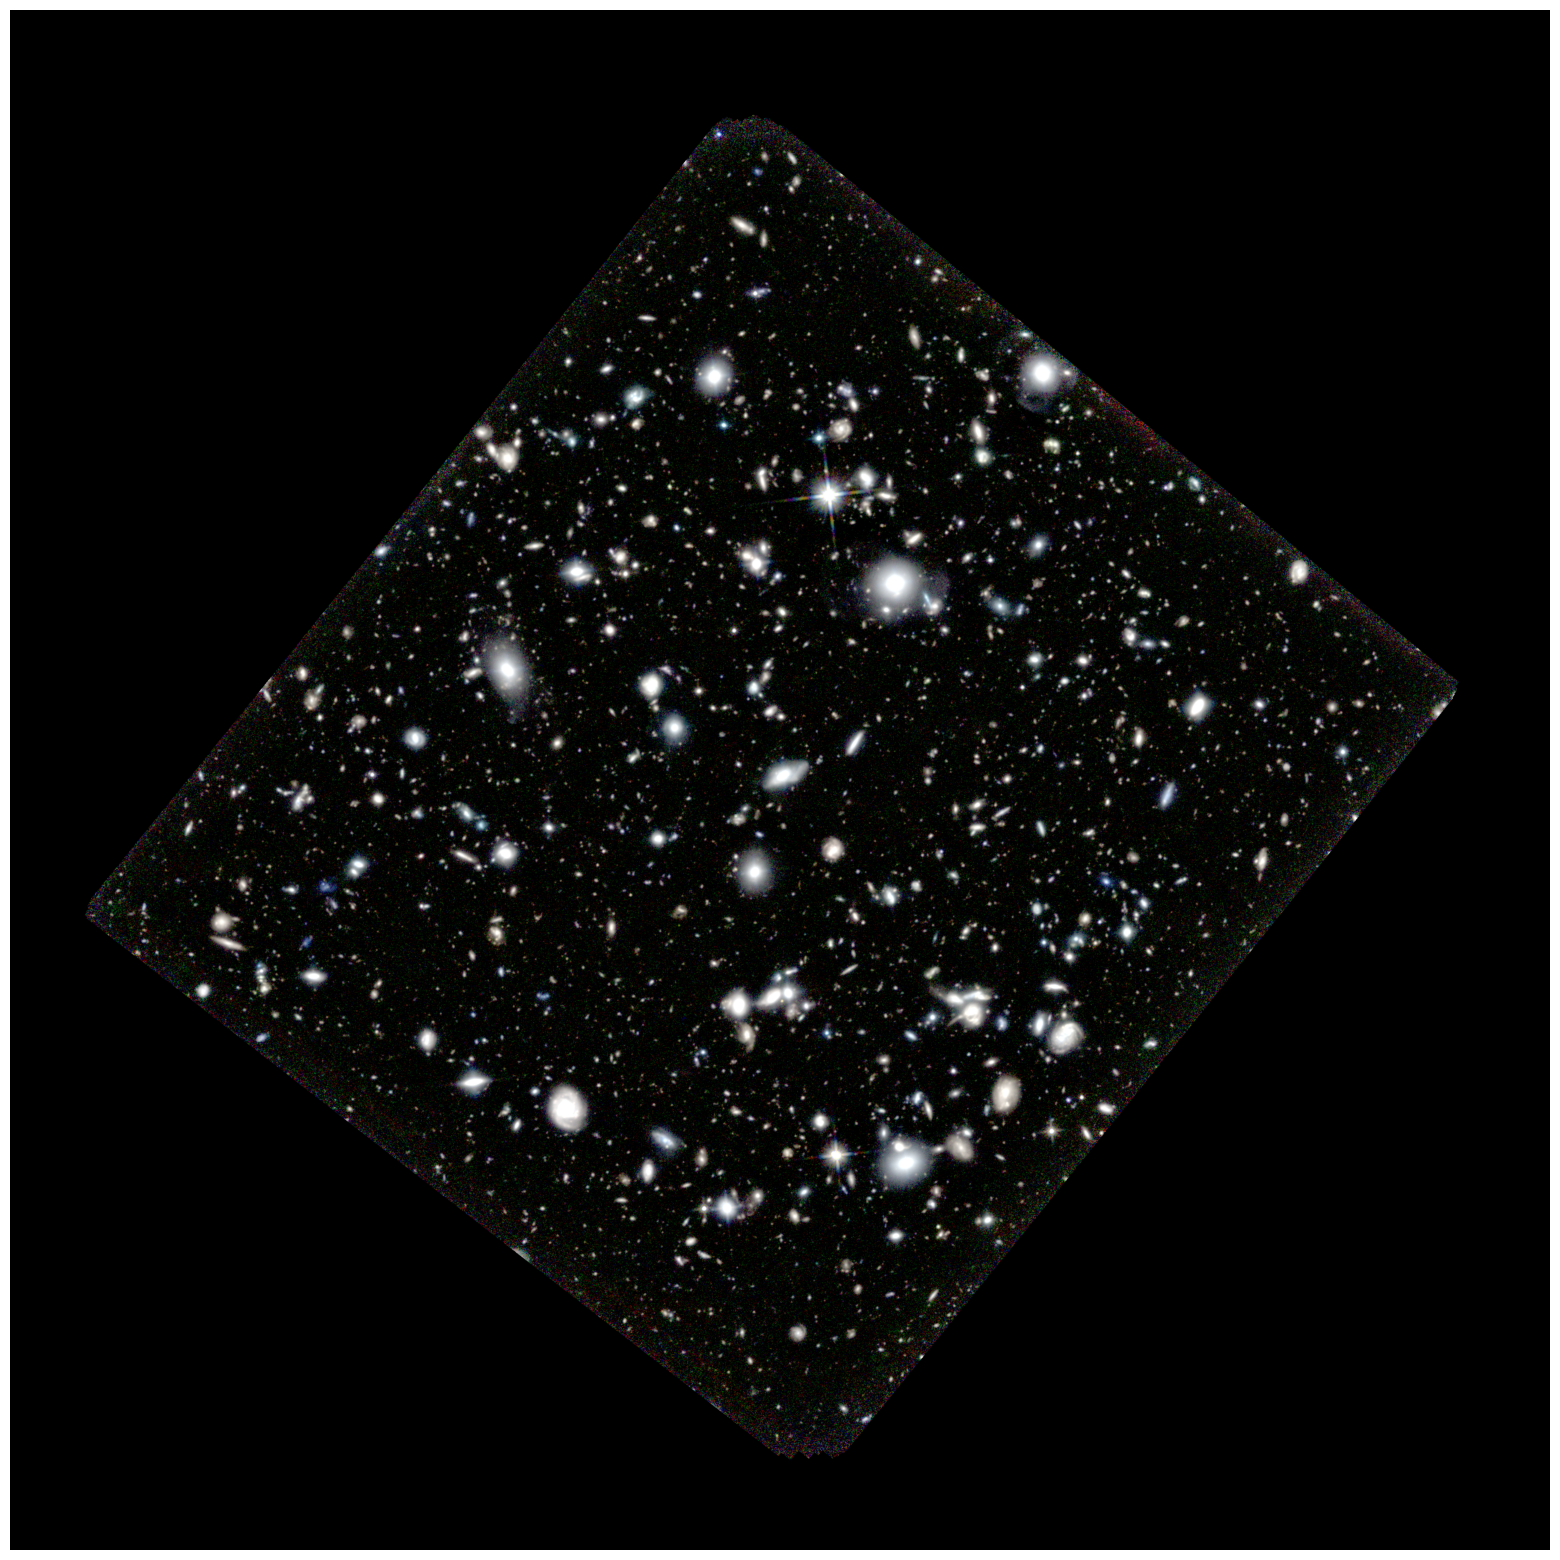

In [31]:
f, ax = plt.subplots(1,1,figsize=(20,20))
ax.axis('off')
ax.imshow(rgb)
plt.savefig('3colorimagergb.png', bbox_inches = 'tight', pad_inches = 0, dpi = 600)